# Rainfall Prediction using Machine Learning

### Dataset Loading

In [70]:
import pandas as pd
rain_data=pd.read_csv('weatherAUS.csv')
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [71]:
from pathlib import Path
Path('plots').mkdir(exist_ok=True)

In [72]:
#convert date to datetime

rain_data['Date']=pd.to_datetime(rain_data['Date'])
#extract month from date

rain_data['Month']=rain_data['Date'].dt.month
#extract year from date

rain_data['Year']=rain_data['Date'].dt.year
#extract day from date

rain_data['Day']=rain_data['Date'].dt.day

rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Year,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,12,2008,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,12,2008,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,12,2008,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,12,2008,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,12,2008,5


In [73]:
rain_data.shape

(142193, 27)

In [74]:
print("Features in the dataset are: ",list(rain_data.columns))

Features in the dataset are:  ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Month', 'Year', 'Day']


### Data Preprocessing and EDA

In [75]:
rain_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Month                0
Year                 0
Day                  0
dtype: int64

In [76]:
rain_data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow             object
Month                     int64
Year                      int64
Day                       int64
dtype: object

In [77]:
#convvert RainToday and RainTomorrow to numeric

rain_data['RainToday'].replace({'No':0,'Yes':1},inplace=True)
rain_data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

#label encode categorical features

from sklearn.preprocessing import LabelEncoder

location_encoder=LabelEncoder()
rain_data['Location']=location_encoder=LabelEncoder().fit_transform(rain_data['Location'])

windgustdir_encoder=LabelEncoder()
rain_data['WindGustDir']=windgustdir_encoder=LabelEncoder().fit_transform(rain_data['WindGustDir'])

winddir9am_encoder=LabelEncoder()
rain_data['WindDir9am']=winddir9am_encoder=LabelEncoder().fit_transform(rain_data['WindDir9am'])

winddir3pm_encoder=LabelEncoder()
rain_data['WindDir3pm']=winddir3pm_encoder=LabelEncoder().fit_transform(rain_data['WindDir3pm'])



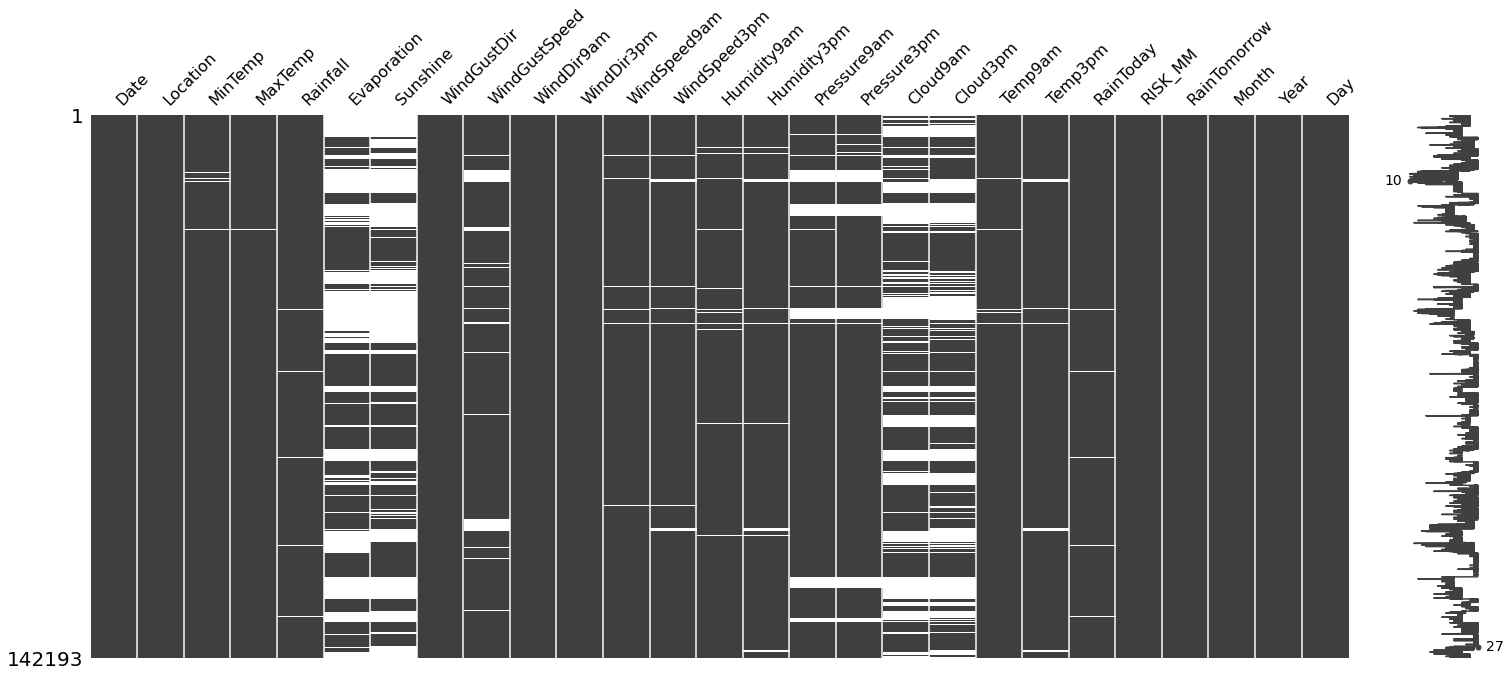

In [78]:
#visualize the missing values
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(rain_data)
plt.savefig('plots/missing_values.png')
plt.show()

In [79]:
#top 4 columns with missing values

rain_data.isnull().sum().sort_values(ascending=False).head(4)

Sunshine       67816
Evaporation    60843
Cloud3pm       57094
Cloud9am       53657
dtype: int64

In [80]:
#let us check the correlation of these features with Rain Today

rain_data[['Sunshine','Evaporation','Cloud3pm','Cloud9am','RainToday']].dropna().corr()['RainToday']

Sunshine      -0.328274
Evaporation   -0.213472
Cloud3pm       0.272842
Cloud9am       0.297819
RainToday      1.000000
Name: RainToday, dtype: float64

In [81]:
#let us check the correlation of these features ignoring null values with Rain Today

rain_data[['Sunshine','Evaporation','Cloud3pm','Cloud9am','RainTomorrow']].dropna().corr()['RainTomorrow']

Sunshine       -0.449260
Evaporation    -0.127151
Cloud3pm        0.389974
Cloud9am        0.319135
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64

In [82]:
#Experiment 1: Drop 4 columns with nearly 50% missing values and tehn drop missing rows

# rain_data.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1,inplace=True)
# rain_data.dropna(inplace=True)


In [83]:
#Experiment 2: Replacing missing values with mean or mode of the column



# #replace missing values with mode of the column
rain_data['Sunshine'].fillna(rain_data['Sunshine'].mode()[0],inplace=True)
rain_data['Evaporation'].fillna(rain_data['Evaporation'].mode()[0],inplace=True)
rain_data['Cloud3pm'].fillna(rain_data['Cloud3pm'].mode()[0],inplace=True)
rain_data['Cloud9am'].fillna(rain_data['Cloud9am'].mode()[0],inplace=True)

# #now check the missing values

rain_data.dropna(inplace=True)

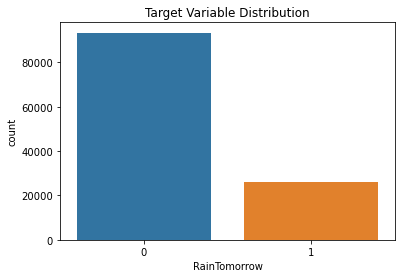

In [84]:
# plot the target variable

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='RainTomorrow',data=rain_data)
plt.title('Target Variable Distribution')
plt.savefig('plots/target_variable_distribution.png')
plt.show()

In [85]:
rain_data['RainTomorrow'].value_counts()

0    93403
1    26187
Name: RainTomorrow, dtype: int64

In [86]:
rain_data.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RISK_MM                 float64
RainTomorrow              int64
Month                     int64
Year                      int64
Day                       int64
dtype: object

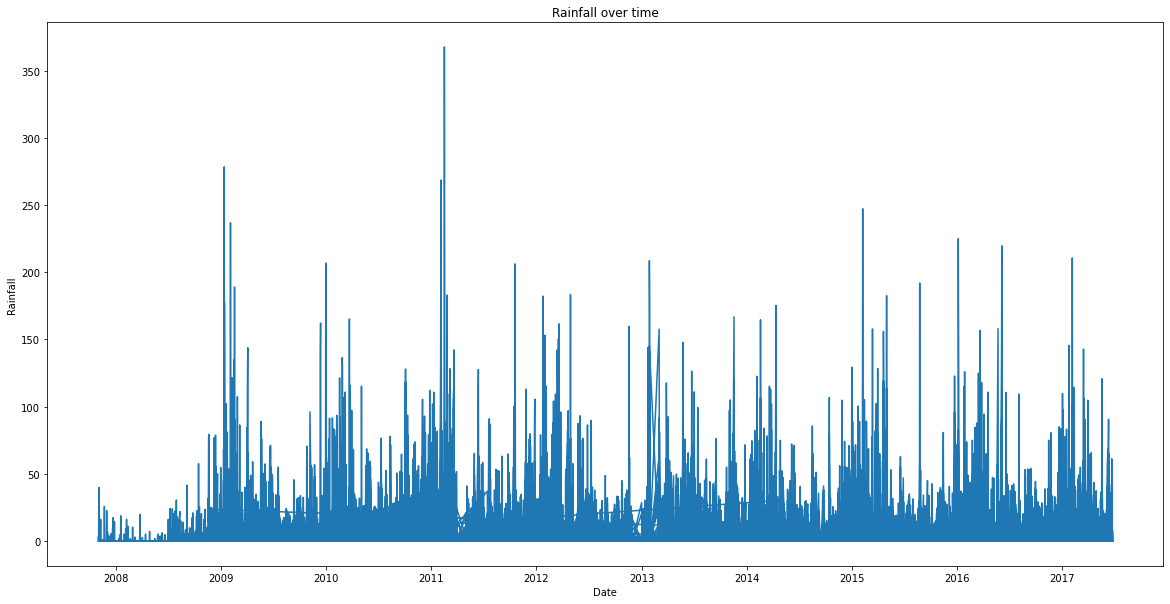

In [87]:
#visualize time series data

#plot the time series data

plt.figure(figsize=(20,10))
plt.plot(rain_data['Date'],rain_data['Rainfall'])
plt.title('Rainfall over time')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.savefig('plots/rainfall_over_time.png')
plt.show()

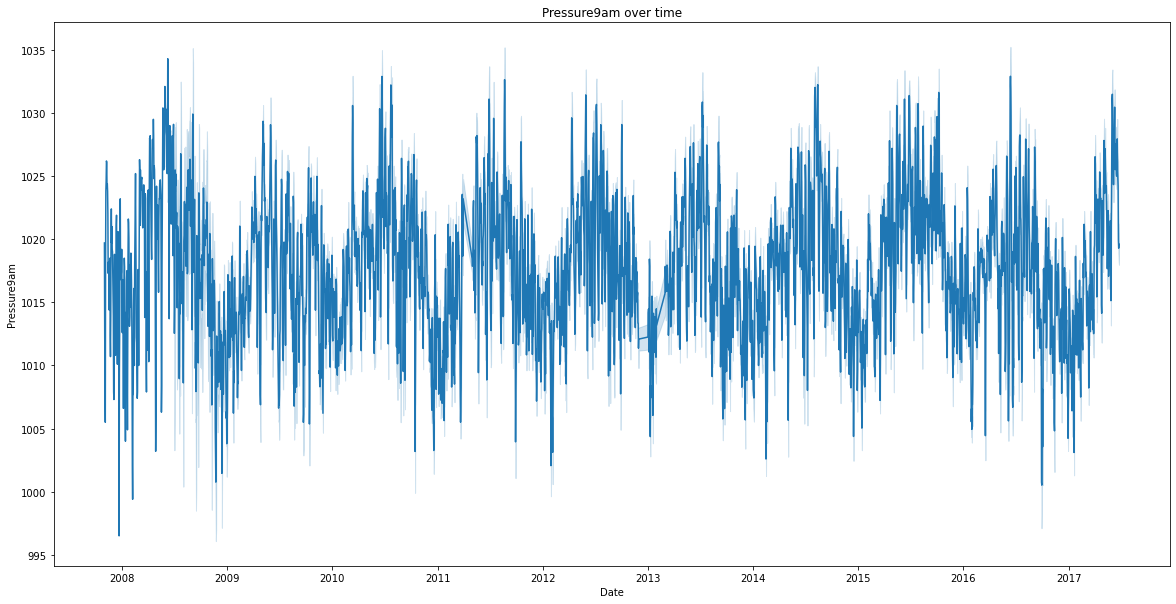

In [88]:
#plot the time series data for pressure 

plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='Pressure9am',data=rain_data)
plt.title('Pressure9am over time')
plt.xlabel('Date')
plt.ylabel('Pressure9am')
plt.savefig('plots/pressure9am.png')
plt.show()

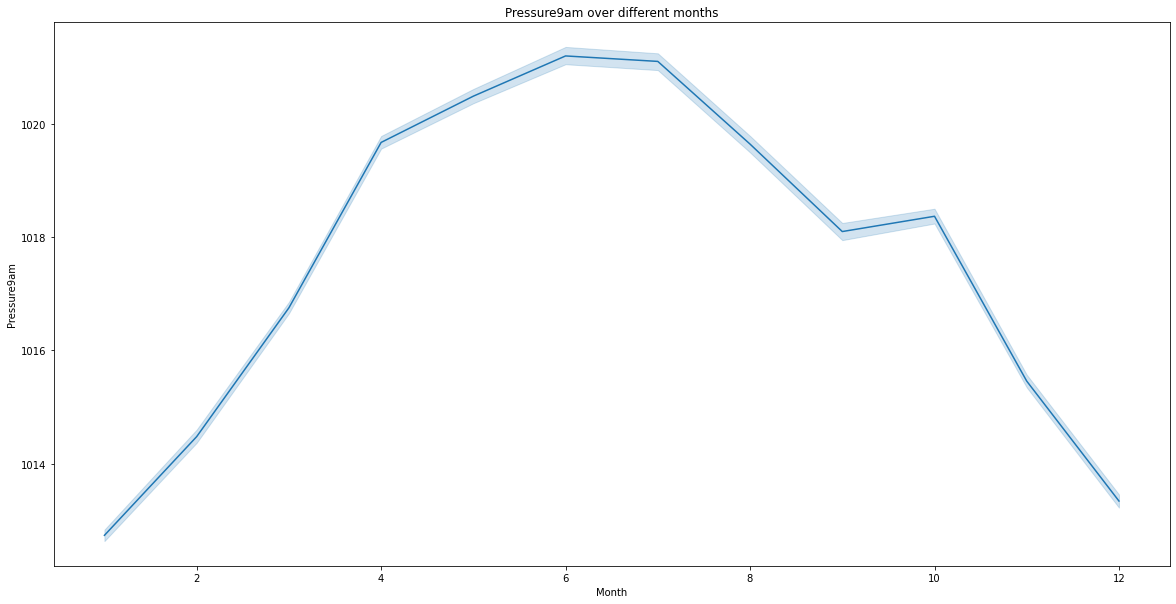

In [89]:
#do month wise analysis

#plot the time series data for pressure

plt.figure(figsize=(20,10))
sns.lineplot(x='Month',y='Pressure9am',data=rain_data)
plt.title('Pressure9am over different months')
plt.xlabel('Month')
plt.ylabel('Pressure9am')
plt.savefig('plots/pressure9am_month.png')
plt.show()

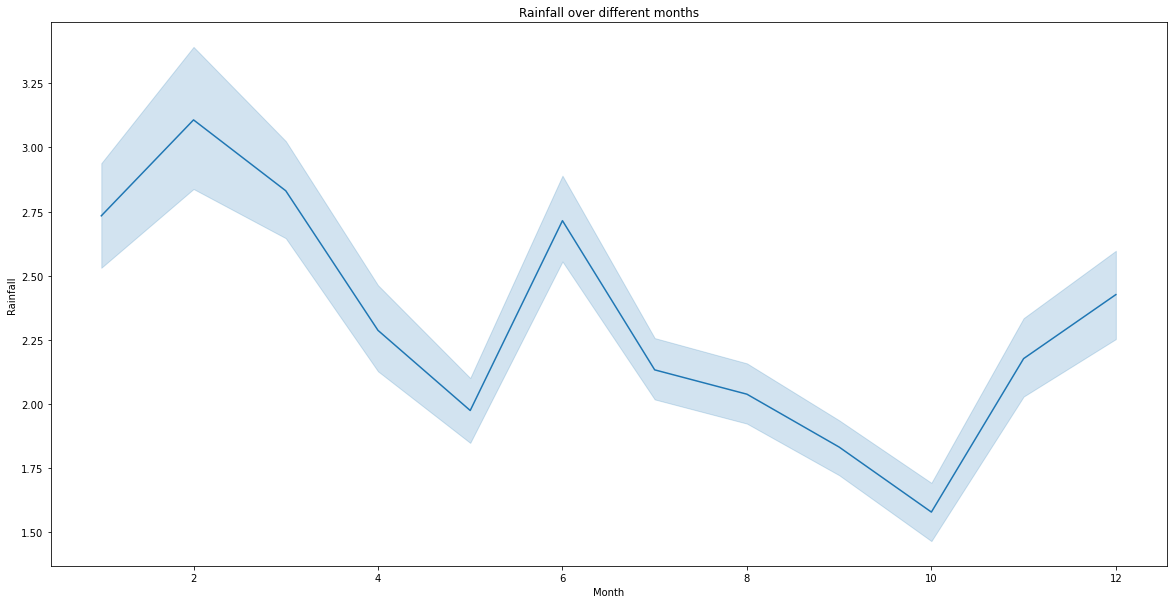

In [90]:
#rainfall over month

plt.figure(figsize=(20,10))
sns.lineplot(x='Month',y='Rainfall',data=rain_data)
plt.title('Rainfall over different months')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.savefig('plots/rainfall_over_month.png')
plt.show()


In [91]:
#remove date column

rain_data.drop('Date',axis=1,inplace=True)
rain_data.drop('Month',axis=1,inplace=True)
rain_data.drop('Year',axis=1,inplace=True)
rain_data.drop('Day',axis=1,inplace=True)

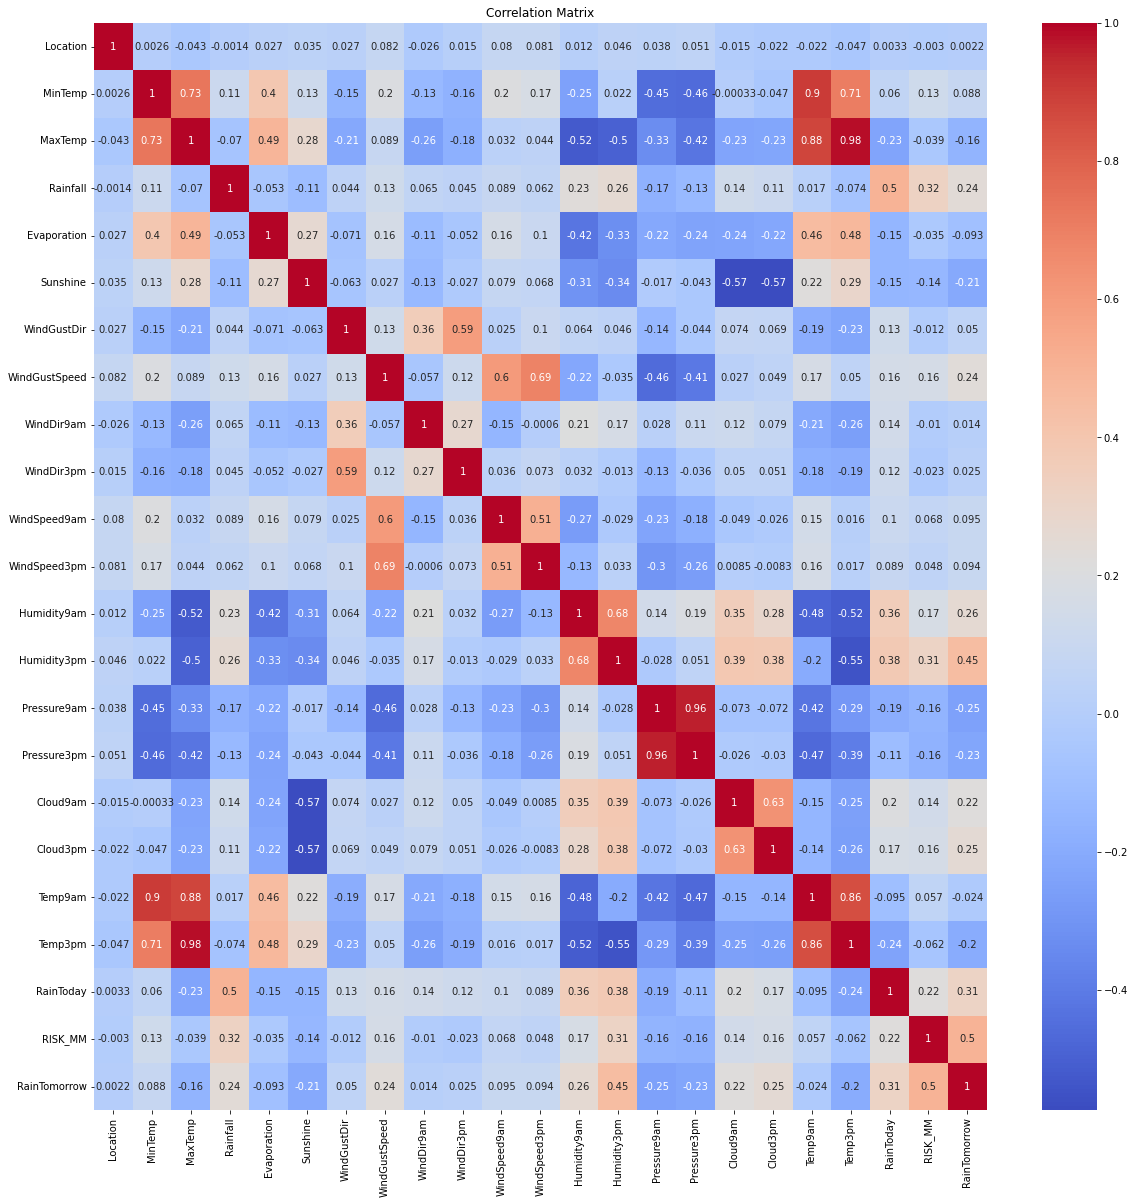

In [92]:
#Draw correlation matrix

corr=rain_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('plots/corr.png')
plt.show()

<Figure size 1440x1440 with 0 Axes>

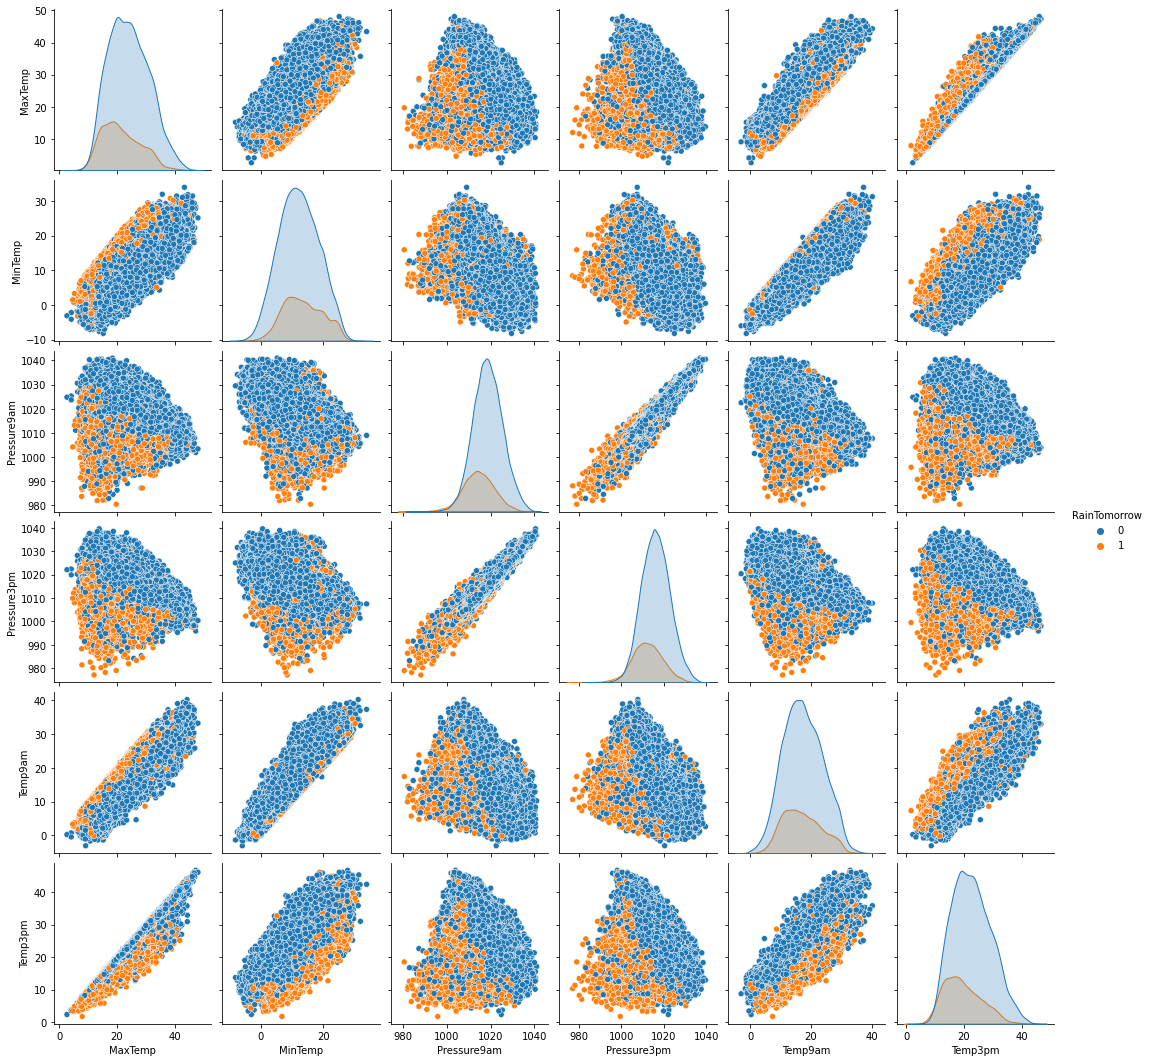

In [93]:
#draw pairplot
plt.figure(figsize=(20,20))
sns.pairplot(data=rain_data,hue='RainTomorrow',vars=['MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm'])
plt.savefig('plots/pairplot.png')
plt.show()

In [94]:
#split the data into train and test

from sklearn.model_selection import train_test_split
X=rain_data.drop(['RainTomorrow'],axis=1)
y=rain_data['RainTomorrow']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [95]:
#Experiment 3: Apply SMOTE on train data

from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

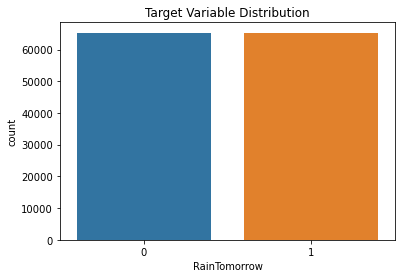

In [96]:
#plot the target variable

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_train)
plt.title('Target Variable Distribution')
plt.savefig('plots/target_variable_distribution_smote.png')
plt.show()

In [97]:
#scale the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Building

In [105]:
results={}

Accuracy Score:  0.8114390835354126
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     28106
           1       0.55      0.77      0.64      7771

    accuracy                           0.81     35877
   macro avg       0.74      0.80      0.76     35877
weighted avg       0.85      0.81      0.82     35877



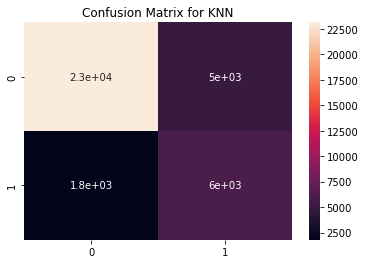

In [107]:
#build K Nearest Neighbors model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#check the accuracy

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

results['KNN']=accuracy_score(y_test,y_pred)

#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for KNN')
plt.savefig('plots/cm_lr.png')
plt.show()


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28106
           1       1.00      1.00      1.00      7771

    accuracy                           1.00     35877
   macro avg       1.00      1.00      1.00     35877
weighted avg       1.00      1.00      1.00     35877



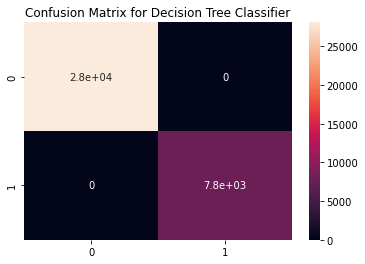

In [108]:
#build Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

#check the accuracy

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
results['Decision Tree']=accuracy_score(y_test,y_pred)
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


#confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig('plots/confusion_matrix_dtc.png')
plt.show()

Accuracy Score:  0.9999721269894362
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28106
           1       1.00      1.00      1.00      7771

    accuracy                           1.00     35877
   macro avg       1.00      1.00      1.00     35877
weighted avg       1.00      1.00      1.00     35877



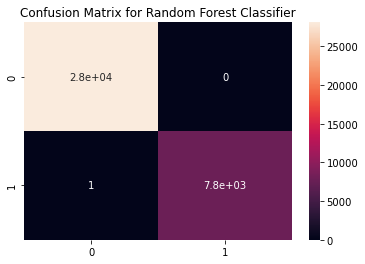

In [109]:
#build Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

#check the accuracy

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
results['Random Forest']=accuracy_score(y_test,y_pred)
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('plots/confusion_matrix_rfc.png')
plt.show()

In [110]:
# #tune the hyperparameters
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
# max_features=['auto','sqrt']
# max_depth=[int(x) for x in np.linspace(5,30,num=3)]
# min_samples_split=[2,5,10,15,100]
# random_grid={'n_estimators':n_estimators,
#                 'max_features':max_features,
#                 'max_depth':max_depth,
#                 'min_samples_split':min_samples_split}
# rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

# rf_random.fit(X_train,y_train)

# rf_random.best_params_

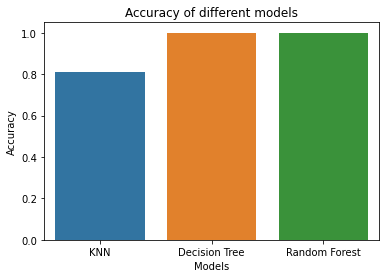

In [111]:

#plot the results
sns.barplot(x=list(results.keys()),y=list(results.values()))
plt.title('Accuracy of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.savefig('plots/accuracy_comparision.png')
plt.show()